# item-based Sander en Hugo

In [1]:
import json
from pandas import Series, Timestamp
import pandas as pd
from pandas import DataFrame
from numpy import nan
import sklearn.metrics.pairwise as pw
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [3]:
data_path = '../data/brossard/'
review_file = 'review.json'
reviews = load_jsons(data_path, review_file)

display(reviews.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Ccc3ZAXEw69lGZg5oAZKHw,YZ7S0_eemKwWR5tHkaMUqw,JD55YRLwptXJVkMRekbzNg,2.0,0,0,0,Average food and service. Kind of dirty and so...,2017-08-16 04:35:11
1,aZOOTcXB28ftRZJnQDMjjA,UiU_yqwSQwTZdw3vxD_Aag,JD55YRLwptXJVkMRekbzNg,4.0,0,0,0,Probably one of the best Vietnamese restaurant...,2017-12-02 20:13:24
2,9qRSlEj4Rcd3NXektgI1hA,vu9dmqZiZSm3ijUP-7HmKA,VvZnozdEpjw0e7Dg-kKIxg,4.0,0,0,0,"Petit restaurant, déco un peu vieillote, mais ...",2014-10-27 03:10:16
3,KTcqaTj8sHT0zJ0V-p1Kjg,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0,0,0,"We went there on a friday night, the whole pla...",2017-01-14 21:20:25
4,22vF44g9TIDsQOpmvVVg6A,_FKhZ0r6uTBNHA_ALWyGqg,KE7cmEKW8IwMFAdmzP72rQ,1.0,1,0,0,Pour un restaurant Italien qui pense que Sauce...,2015-06-08 19:09:25


## Split test and training set

In [4]:
def split_data(data, d = 0.75):
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

reviews_training, reviews_test = split_data(reviews, d=0.9)

## Pivot a utility table

In [5]:
def pivot_ratings(df):
    return df.pivot_table(values='stars', columns='user_id', index='business_id')

review_utitity_ratings = pivot_ratings(reviews_training)
display(review_utitity_ratings.head())

user_id,-01y5njeBMu1eAdIKdGG1g,-0SqALqeWmInVftG_iHcHg,-41z9zaHp6oONyUNfMDZjw,-5rgQfe0j-0AGl4B9g7DQg,-B4Cf2XLkPr9qMlLPHJAlw,-HHyrZ15Yr-3vDfo087n0A,-HMryuf0scfllObkYFF0hg,-LdOcazGWhUVrrLNpUgfvQ,-MlnpvmMOE9lb3noLlr6bQ,-OnlG_cVLxqUS_2_gCYqhA,...,ysnP1M717ewk8-BjxpzJOQ,zHvAuiMHZEgoXHFDMfszKw,zLkbxR1IvwnEbbztvZDfmw,zUFamSWdxK0qUS7Uwajf9g,zWWcik1fRPZviBCQLC26FQ,zg-C8Gu-tZq_RVoZhUOMQw,zhg-j5H6UsCd_DnpvNIprA,zhoytEzEitvTtUfXU99cIA,zmhC7E1NGHNGf0ITtsxGuw,ztnFttrQ7Rz5neGMcFsXxg
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-juOL0eJC6kvf5RLEjoPvA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN
-yEFjBrxf2r_BQzRnczzdw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1blpPH0_3jk2EnRz_Q_CuQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1h3aXVtJLx2o4mArNuhf2w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0


## Create similarity matrices

In [6]:
def create_similarity_matrix_cosine(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_euclidean(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.euclidean_distances(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_I(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.polynomial_kernel(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

def create_similarity_matrix_II(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.sigmoid_kernel(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)



In [7]:
cosine_similarity_ratings = create_similarity_matrix_cosine(review_utitity_ratings)
display(cosine_similarity_ratings.head(5))

euclidean_similarity_ratings = create_similarity_matrix_euclidean(review_utitity_ratings)
display(euclidean_similarity_ratings.head(5))

I_similarity_ratings = create_similarity_matrix_I(review_utitity_ratings)
display(I_similarity_ratings.head(5))

II_similarity_ratings = create_similarity_matrix_II(review_utitity_ratings)
display(II_similarity_ratings.head(5))

business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,1.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
-juOL0eJC6kvf5RLEjoPvA,0.0,1.000000,-0.262998,0.0,-0.0197,-0.154605,-0.261096,0.074863,0.052742,0.000000,...,-0.443022,0.056447,0.0,-0.257678,0.0,0.0,-0.156970,0.000000,-0.006150,0.168072
-yEFjBrxf2r_BQzRnczzdw,0.0,-0.262998,1.000000,0.0,0.0000,0.014151,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-0.025869,0.007642,0.007472
1blpPH0_3jk2EnRz_Q_CuQ,0.0,0.000000,0.000000,1.0,0.0000,0.000000,0.000000,-0.505900,0.000000,0.000000,...,0.000000,0.247026,0.0,0.000000,0.0,0.0,0.410404,0.075178,0.035880,0.000000
1h3aXVtJLx2o4mArNuhf2w,0.0,-0.019700,0.000000,0.0,1.0000,0.039226,0.000000,-0.014942,-0.061946,0.244174,...,0.090201,0.000000,0.0,0.000000,0.0,0.0,0.036725,-0.622518,-0.022149,-0.080835


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,0.000000,5.740940,1.886336,1.165952,3.361931,2.410714,1.135158,2.565148,3.550933,1.273774,...,3.787760,3.413958,2.507987,1.911196,2.118962,1.374773,4.388065,2.750477,4.109916,4.196540
-juOL0eJC6kvf5RLEjoPvA,5.740940,0.000000,6.206179,5.640731,6.516472,6.323661,5.685471,5.923842,6.408246,5.664000,...,7.928548,6.329526,6.062046,6.213638,5.911717,5.687565,7.564041,6.166321,6.900996,6.357129
-yEFjBrxf2r_BQzRnczzdw,1.886336,6.206179,0.000000,1.554898,3.515799,2.603454,1.531943,2.763738,3.696943,1.637304,...,3.924970,3.565582,2.710768,2.170469,2.355475,1.717051,4.507037,2.970003,4.225854,4.310147
1blpPH0_3jk2EnRz_Q_CuQ,1.165952,5.640731,1.554898,0.000000,3.187793,2.161247,0.384745,2.492430,3.386527,0.694222,...,3.634084,3.160274,2.269239,1.584966,1.830149,0.865705,4.118536,2.509894,3.956889,4.058373
1h3aXVtJLx2o4mArNuhf2w,3.361931,6.516472,3.515799,3.187793,0.000000,3.752715,3.176659,3.949850,4.768185,3.078974,...,4.591264,4.523018,3.884917,3.529200,3.645899,3.269951,5.202839,5.127153,5.123423,5.337309


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,1.004398,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.00000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
-juOL0eJC6kvf5RLEjoPvA,1.000000,1.115575,0.992117,1.000000,0.998765,0.993482,0.998986,1.003423,1.003520,1.000000,...,0.968619,1.003606,1.0,0.99212,1.0,1.0,0.986882,1.000000,0.999519,1.013508
-yEFjBrxf2r_BQzRnczzdw,1.000000,0.992117,1.008131,1.000000,1.000000,1.000161,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.00000,1.0,1.0,1.000000,0.999653,1.000161,1.000161
1blpPH0_3jk2EnRz_Q_CuQ,1.000000,1.000000,1.000000,1.000385,1.000000,1.000000,1.000000,0.998643,1.000000,1.000000,...,1.000000,1.000926,1.0,1.00000,1.0,1.0,1.002025,1.000220,1.000165,1.000000
1h3aXVtJLx2o4mArNuhf2w,1.000000,0.998765,1.000000,1.000000,1.035731,1.000933,1.000000,0.999616,0.997676,1.001661,...,1.003640,1.000000,1.0,1.00000,1.0,1.0,1.001737,0.982677,0.999025,0.996363


business_id,-L9vtxgF0CZ25z-8HqHfDg,-juOL0eJC6kvf5RLEjoPvA,-yEFjBrxf2r_BQzRnczzdw,1blpPH0_3jk2EnRz_Q_CuQ,1h3aXVtJLx2o4mArNuhf2w,2LRt7Y2-eqpbeDWO2BsPMg,2VAH-mSQXRNpaXysiLtm0Q,2lG2I1LyN6rCiw9U6wKtQg,2nGab5EU6uEmhlI_ovplOw,3M7MWfMh5RSoASV23-6hEw,...,vHJlN629vOqgI40noEOdlw,xBWn8DSwxzwkWL4JhfzP2g,xLDU3RQ1Ni_wTioEib_VIQ,xMhPyj9NEKEUpcWQMjpqKQ,xVNdvQQFV7pLfHe6xZ41dQ,yBkgxB_vpwYdsg4WqObRXA,yEzyioaCCZlvlEstY9LNEQ,yYzZScLRg1tNaZZrlz1Z3A,yvYCSzQm9tjZoBV_gJS7bQ,zHzV2hmXsRYxDNAxvPOVKw
business_id,,,,,,,,,,,,,,,,,,,,,
-L9vtxgF0CZ25z-8HqHfDg,0.762208,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
-juOL0eJC6kvf5RLEjoPvA,0.761594,0.776752,0.760485,0.761594,0.761421,0.760678,0.761452,0.762072,0.762086,0.761594,...,0.757118,0.762098,0.761594,0.760486,0.761594,0.761594,0.759744,0.761594,0.761527,0.763470
-yEFjBrxf2r_BQzRnczzdw,0.761594,0.760485,0.762727,0.761594,0.761594,0.761617,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761546,0.761617,0.761617
1blpPH0_3jk2EnRz_Q_CuQ,0.761594,0.761594,0.761594,0.761648,0.761594,0.761594,0.761594,0.761404,0.761594,0.761594,...,0.761594,0.761724,0.761594,0.761594,0.761594,0.761594,0.761877,0.761625,0.761617,0.761594
1h3aXVtJLx2o4mArNuhf2w,0.761594,0.761421,0.761594,0.761594,0.766494,0.761725,0.761594,0.761540,0.761268,0.761826,...,0.762103,0.761594,0.761594,0.761594,0.761594,0.761594,0.761837,0.759144,0.761458,0.761084


## Predict ratings

In [8]:
def predict_ratings(similarity, utility, to_predict):
    ratings_test_c = to_predict.copy()
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

def predict_ids(similarity, utility, user_id, business_id):
    if user_id in utility.columns and business_id in similarity.index:
        return predict_vectors(utility.loc[:,user_id], similarity[business_id])
    return 0

def predict_vectors(user_ratings, similarities):
    relevant_ratings = user_ratings.dropna()
    similarities_s = similarities[relevant_ratings.index]
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    return np.dot(relevant_ratings, similarities_s)/norm



In [9]:
predicted_item_based_cosine = predict_ratings(cosine_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_cosine.head(5))

predicted_item_based_euclidean = predict_ratings(euclidean_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_euclidean.head(5))

predicted_item_based_I = predict_ratings(I_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_I.head(5))

predicted_item_based_II = predict_ratings(II_similarity_ratings, review_utitity_ratings, reviews_test[['user_id', 'business_id', 'stars']])
display(predicted_item_based_II.head(5))


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,4.000000
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,4.228337
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.778170
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,3.893479
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.785991
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,3.899944
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.785765
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,3.899990
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000


### EVALUATION



In [10]:
treshold_used = 4

def get_confusion(prediction, treshold):
    re = recommended(prediction, treshold)
    hi = hidden(prediction, treshold)
    us = used(prediction, treshold_used)
    un = unused(prediction, treshold_used)
    
    return confusion(re, hi, us, un)

def recommended(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] >= treshold]
    return predictions

def hidden(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] < treshold]
    return predictions

def used(predictions, treshold):
    predictions = predictions[predictions["stars"] >= treshold]
    return predictions
    
def unused(predictions, treshold):
    predictions = predictions[predictions["stars"] < treshold]
    return predictions

def confusion(recommended, hidden, used, unused):
    true_positive = len(recommended.index.intersection(used.index))
    false_positive = len(recommended.index.intersection(unused.index))
    true_negative = len(hidden.index.intersection(unused.index))
    false_negative = len(hidden.index.intersection(used.index))
    
    solution = pd.DataFrame([[true_positive, false_positive], [false_negative, true_negative]], columns=['used', 'unused'],
                         index=['recommended', 'hidden'])
    return solution
    
def precision(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    recommended = confusion_matrix["used"]["recommended"] + confusion_matrix["unused"]["recommended"]
    return true_positives/recommended

def recall(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    used_items = confusion_matrix["used"]["recommended"] + confusion_matrix["used"]["hidden"]
    return true_positives/used_items

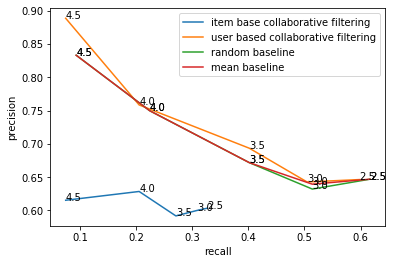

In [15]:
tresholds = [2.5, 3.0, 3.5, 4.0, 4.5]

def plot_precision_recall(prediction, tresholds):
    recalls = []
    precisons = []
    for treshold in tresholds:
        confusion = get_confusion(prediction, treshold)
        precisons.append(precision(confusion))
        recalls.append(recall(confusion))
    
    plt.plot(recalls, precisons)
    for r, p, t in zip(recalls, precisons, tresholds):
        plt.text(r, p, t)
        


plt.xlabel('recall')
plt.ylabel('precision')        

plot_precision_recall(predicted_item_based_cosine, tresholds)        
plot_precision_recall(predicted_item_based_euclidean, tresholds)
plot_precision_recall(predicted_item_based_I, tresholds) 
plot_precision_recall(predicted_item_based_II, tresholds)        

plt.legend(['item base collaborative filtering', 'user based collaborative filtering', 'random baseline','mean baseline '], loc = 'upper right')

In [12]:
display(predicted_item_based_euclidean)

,user_id,business_id,stars,predicted rating
3,S-t12afI5gGgVWZTV3iQNQ,n2dhdtnOzqeAKSn6s3nQSw,2.0,0.000000
27,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,1.0,0.000000
28,Umf3Iw_TY-cA6JfyLifYEA,n2dhdtnOzqeAKSn6s3nQSw,4.0,3.778170
39,3zdB0SSrXIDIgsrOmhdUtQ,7K9EGbodeoDoOzQvkNPoAw,4.0,3.893479
43,i_4JP5Co6WZqgoPHnIPh4g,qxdZWoRVwf4lpI_gjAN2gA,4.0,0.000000
...,...,...,...,...
1747,8RcFjtuz-1RZ3wciM0AsyQ,dkERhCfr5q0Qcbh7a6Tecw,5.0,0.000000
1754,kSUIdxz2w2a7tq8DgeGjdw,7rTkeIRgR5CENyQ3hNOT5w,5.0,0.000000
1757,ylT3yucPqLuCiaOhN1o4-Q,xLDU3RQ1Ni_wTioEib_VIQ,3.0,3.414732
1766,sAdhEePzikiWPHV15MqZ5w,ExHkmNrEBKlwXL2KEILfCw,3.0,0.000000
